# BATTERY DEGRADATION ANALYSIS
By Aadil Khatri and Nik Paulic

## 1. Project Description
<insert description>

The goal of this project is to develop a ML model of the Electric vehicle’s battery system to optimize its performance, efficiency and longevity. This analysis specifically will assess the battery performance and degradation by first performing a regression analysis on the battery temperature, followed by a classification analysis on the battery health. 

The data has been provided by Joy-E-Bike in order to support this project. Joy-E-Bike rents electric scooters to residents around India to easily navigate cities and commute. The dataset provided includes months of real-time driving & stationary data under real road conditions. The model of the scooter in analysis is Joy-E-Bike Mihos, in which we will be analyzing the data of two vehicles.

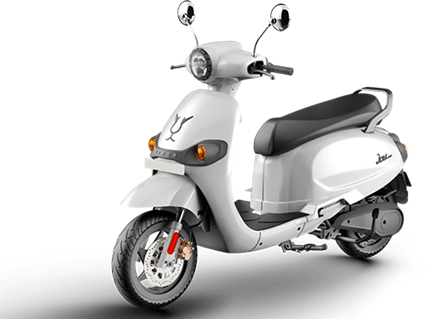

(photo from  https://www.joyebike.com/booknow/)

## 2. Data Preprocessing

### 2.1 Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import seaborn as sns

### 2.2 Import Data

The datasets available are of four different vehicles identified as TV-03, TV-04, TV-07, and TV-09. Upon opening the datasets, it was discovered that the data in TV-03 and TV-07 were corrupted and missing too much data to provide relevant information for a model, and were deemed to be unusable. 

In this analysis, we shall consider the cases for TV-03 and TV-04. Both models shall be compared and used in validating a test case.

In [7]:
dataset_07 = pd.read_csv('DATA_FINAL/TV-07 - 1 MARCH TO 31 MARCH_Final.csv')
dataset_04 = pd.read_csv('DATA_FINAL/TV-04 - 1 MARCH TO 31 MARCH_Final.csv')

## 2.3 Information about the Datasets

In [9]:
dataset_04.info

<bound method DataFrame.info of                       Date Vehicle Status  GPS Odometer (km)  \
0      31-03-2024 23:59:04           Stop             8825.6   
1      31-03-2024 23:58:04           Stop             8825.6   
2      31-03-2024 23:57:04           Stop             8825.6   
3      31-03-2024 23:56:04           Stop             8825.6   
4      31-03-2024 23:55:04           Stop             8825.6   
...                    ...            ...                ...   
44566        1/3/2024 0:04           Stop             8071.4   
44567        1/3/2024 0:03           Stop             8071.4   
44568        1/3/2024 0:02           Stop             8071.4   
44569        1/3/2024 0:01           Stop             8071.4   
44570        1/3/2024 0:00           Stop             8071.4   

       CAN Speed (km/h)  Battery Current (A)  Battery SOC (%)  \
0                     0                  0.0             21.9   
1                     0                  0.0             21.9   
2   

In [10]:
dataset_04.head()

,Date,Vehicle Status,GPS Odometer (km),CAN Speed (km/h),Battery Current (A),Battery SOC (%),Battery Capacity - Remaining (A),Battery Capacity - Full,Battery Cycle Count,Battery Status,Battery Fault,Motor Current (A),Gear Position,Throttle Command (%),Brake Status,Gears Display,Internal Battery (%),Battery Health,NTC Probe 5 (Â°C),Battery Condition
0,31-03-2024 23:59:04,Stop,8825.6,0,0.0,21.9,7.9,36.0,135,Stationary,1,0.0,Eco,0,No Brake,Parking,100,85.14,33,Poor
1,31-03-2024 23:58:04,Stop,8825.6,0,0.0,21.9,7.9,36.0,135,Stationary,1,0.0,Eco,0,No Brake,Parking,100,85.14,33,Poor
2,31-03-2024 23:57:04,Stop,8825.6,0,0.0,21.9,7.9,36.0,135,Stationary,1,0.0,Eco,0,No Brake,Parking,100,85.14,33,Poor
3,31-03-2024 23:56:04,Stop,8825.6,0,0.0,21.9,7.9,36.0,135,Stationary,1,0.0,Eco,0,No Brake,Parking,100,85.14,33,Poor
4,31-03-2024 23:55:04,Stop,8825.6,0,0.0,21.9,7.9,36.0,135,Stationary,1,0.0,Eco,0,No Brake,Parking,100,85.14,33,Poor


In [11]:
dataset_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8519 non-null   object 
 1   Vehicle Status                    8519 non-null   object 
 2   GPS Odometer (km)                 8519 non-null   float64
 3   CAN Speed (km/h)                  8519 non-null   int64  
 4   Battery Current (A)               8519 non-null   float64
 5   Battery SOC (%)                   8519 non-null   float64
 6   Battery Capacity - Remaining (A)  8519 non-null   float64
 7   Battery Capacity - Full           8519 non-null   float64
 8   Battery Cycle Count               8519 non-null   int64  
 9   Battery Status                    8519 non-null   object 
 10  Battery Fault                     8519 non-null   int64  
 11  Motor Current (A)                 8519 non-null   float64
 12  Gear P

In [12]:
dataset_07.head()

,Date,Vehicle Status,GPS Odometer (km),CAN Speed (km/h),Battery Current (A),Battery SOC (%),Battery Capacity - Remaining (A),Battery Capacity - Full,Battery Cycle Count,Battery Status,Battery Fault,Motor Current (A),Gear Position,Throttle Command (%),Brake Status,Gears Display,Internal Battery (%),Battery Health,NTC Probe 5 (Â°C),Battery Condition
0,31-03-2024 23:54:18,Stop,7774.7,0,0.0,0.0,0.0,41.0,98,Stationary,1,0.0,Eco,0,No Brake,Parking,100,97.619048,30,Good
1,31-03-2024 23:44:18,Stop,7774.7,0,0.0,0.0,0.0,41.0,98,Stationary,1,0.0,Eco,0,No Brake,Parking,100,97.619048,30,Good
2,31-03-2024 23:34:18,Stop,7774.7,0,0.0,0.0,0.0,41.0,98,Stationary,1,0.0,Eco,0,No Brake,Parking,100,97.619048,31,Good
3,31-03-2024 23:24:18,Stop,7774.7,0,0.0,0.0,0.0,41.0,98,Stationary,1,0.0,Eco,0,No Brake,Parking,100,97.619048,31,Good
4,31-03-2024 23:18:56,Stop,7774.7,0,0.0,0.0,0.0,41.0,98,Stationary,1,0.0,Eco,0,No Brake,Parking,100,97.619048,31,Good


In [13]:
columns = dataset_04.columns
dataset_04 = dataset_04.drop(columns=['Date'])
columns = dataset_07.columns
dataset_07 = dataset_07.drop(columns=['Date'])

## Encoding the Categorical Columns

In [15]:
#To encode: Vehicle Status, Battery Status, Gear Position, Brake Status, Gears Display, Battery Condition
# One-hot encoding for the 'Gender' column
VeSts_ecd_4 = pd.get_dummies(dataset_04['Vehicle Status'], prefix='Vehicle Status')
BaSts_ecd_4 = pd.get_dummies(dataset_04['Battery Status'], prefix='Battery Status')
GePos_ecd_4 = pd.get_dummies(dataset_04['Gear Position'], prefix='Gear Position')
BkSts_ecd_4 = pd.get_dummies(dataset_04['Brake Status'], prefix='Brake Status')
GeDis_ecd_4 = pd.get_dummies(dataset_04['Gears Display'], prefix='Gears Display')
BaCon_ecd_4 = pd.get_dummies(dataset_04['Battery Condition'], prefix='Battery Condition')

VeSts_ecd_7 = pd.get_dummies(dataset_07['Vehicle Status'], prefix='Vehicle Status')
BaSts_ecd_7 = pd.get_dummies(dataset_07['Battery Status'], prefix='Battery Status')
GePos_ecd_7 = pd.get_dummies(dataset_07['Gear Position'], prefix='Gear Position')
BkSts_ecd_7 = pd.get_dummies(dataset_07['Brake Status'], prefix='Brake Status')
GeDis_ecd_7 = pd.get_dummies(dataset_07['Gears Display'], prefix='Gears Display')
BaCon_ecd_7 = pd.get_dummies(dataset_07['Battery Condition'], prefix='Battery Condition')

# Concatenate the one-hot encoded columns back to the original data and drop the old column
dataset_04 = pd.concat([dataset_04, VeSts_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Vehicle Status', axis=1)
dataset_04 = pd.concat([dataset_04, BaSts_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Battery Status', axis=1)
dataset_04 = pd.concat([dataset_04, GePos_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Gear Position', axis=1)
dataset_04 = pd.concat([dataset_04, BkSts_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Brake Status', axis=1)
dataset_04 = pd.concat([dataset_04, GeDis_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Gears Display', axis=1)
dataset_04 = pd.concat([dataset_04, BaCon_ecd_4], axis=1)
dataset_04 = dataset_04.drop('Battery Condition', axis=1)

dataset_07 = pd.concat([dataset_07, VeSts_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Vehicle Status', axis=1)
dataset_07 = pd.concat([dataset_07, BaSts_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Battery Status', axis=1)
dataset_07 = pd.concat([dataset_07, GePos_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Gear Position', axis=1)
dataset_07 = pd.concat([dataset_07, BkSts_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Brake Status', axis=1)
dataset_07 = pd.concat([dataset_07, GeDis_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Gears Display', axis=1)
dataset_07 = pd.concat([dataset_07, BaCon_ecd_7], axis=1)
dataset_07 = dataset_07.drop('Battery Condition', axis=1)

In [16]:
dataset_04.head()

,GPS Odometer (km),CAN Speed (km/h),Battery Current (A),Battery SOC (%),Battery Capacity - Remaining (A),Battery Capacity - Full,Battery Cycle Count,Battery Fault,Motor Current (A),Throttle Command (%),...,Battery Status_Discharging,Battery Status_Stationary,Gear Position_Eco,Gear Position_Hyper,Gear Position_Sport,Brake Status_No Brake,Gears Display_Drive,Gears Display_Parking,Battery Condition_Good,Battery Condition_Poor
0,8825.6,0,0.0,21.9,7.9,36.0,135,1,0.0,0,...,False,True,True,False,False,True,False,True,False,True
1,8825.6,0,0.0,21.9,7.9,36.0,135,1,0.0,0,...,False,True,True,False,False,True,False,True,False,True
2,8825.6,0,0.0,21.9,7.9,36.0,135,1,0.0,0,...,False,True,True,False,False,True,False,True,False,True
3,8825.6,0,0.0,21.9,7.9,36.0,135,1,0.0,0,...,False,True,True,False,False,True,False,True,False,True
4,8825.6,0,0.0,21.9,7.9,36.0,135,1,0.0,0,...,False,True,True,False,False,True,False,True,False,True


In [17]:
dataset_07.head()

,GPS Odometer (km),CAN Speed (km/h),Battery Current (A),Battery SOC (%),Battery Capacity - Remaining (A),Battery Capacity - Full,Battery Cycle Count,Battery Fault,Motor Current (A),Throttle Command (%),...,Battery Status_Discharging,Battery Status_Stationary,Gear Position_Eco,Gear Position_Hyper,Gear Position_Sport,Brake Status_No Brake,Gears Display_Drive,Gears Display_Parking,Battery Condition_Good,Battery Condition_Poor
0,7774.7,0,0.0,0.0,0.0,41.0,98,1,0.0,0,...,False,True,True,False,False,True,False,True,True,False
1,7774.7,0,0.0,0.0,0.0,41.0,98,1,0.0,0,...,False,True,True,False,False,True,False,True,True,False
2,7774.7,0,0.0,0.0,0.0,41.0,98,1,0.0,0,...,False,True,True,False,False,True,False,True,True,False
3,7774.7,0,0.0,0.0,0.0,41.0,98,1,0.0,0,...,False,True,True,False,False,True,False,True,True,False
4,7774.7,0,0.0,0.0,0.0,41.0,98,1,0.0,0,...,False,True,True,False,False,True,False,True,True,False


## Data Visualization

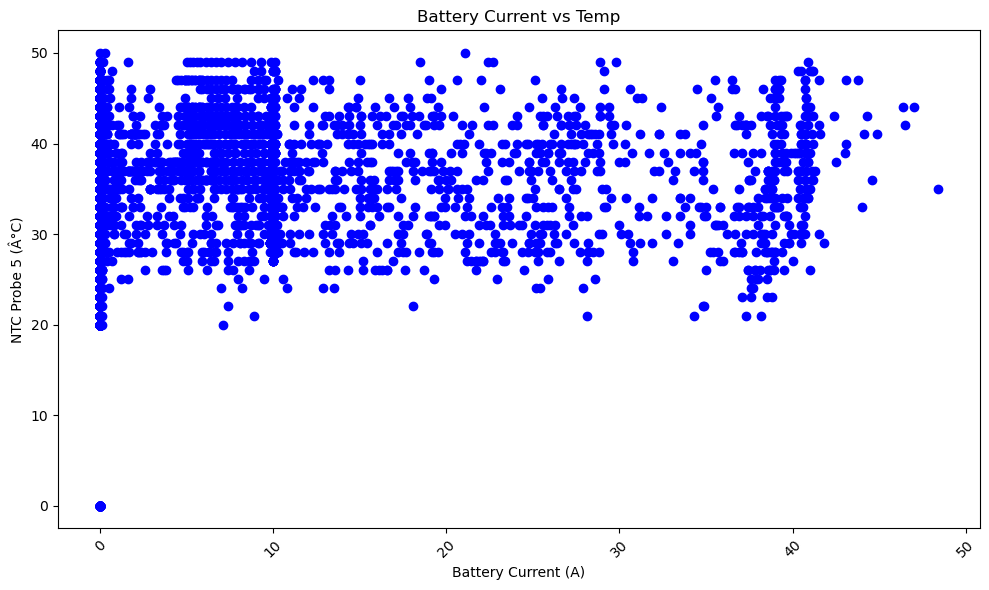

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_04['Battery Current (A)'].abs(), dataset_04['NTC Probe 5 (Â°C)'].abs(), color='blue', marker='o')
plt.title('Battery Current vs Temp')
plt.xlabel('Battery Current (A)')
plt.ylabel('NTC Probe 5 (Â°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

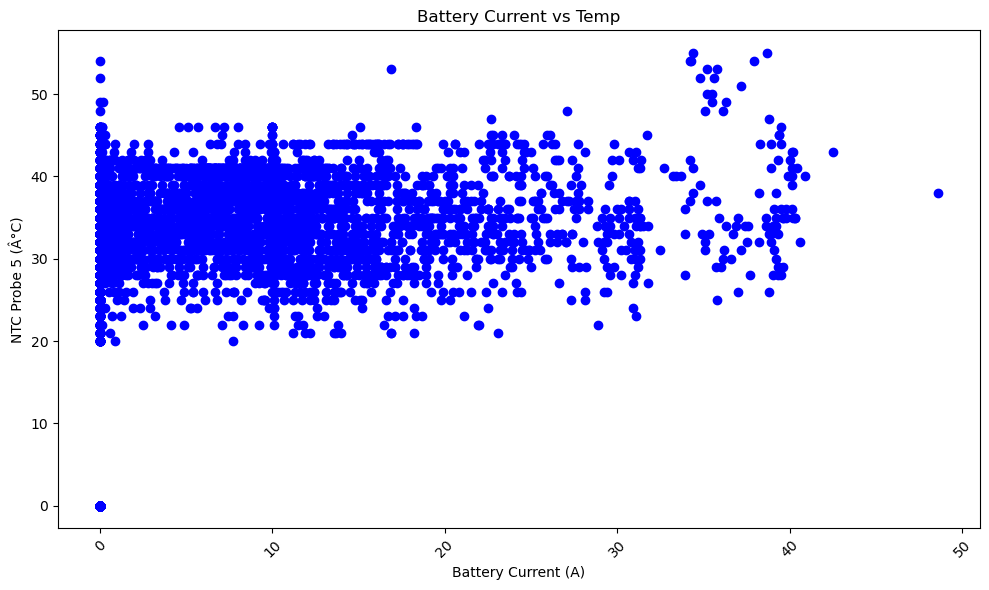

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_07['Battery Current (A)'].abs(), dataset_07['NTC Probe 5 (Â°C)'].abs(), color='blue', marker='o')
plt.title('Battery Current vs Temp')
plt.xlabel('Battery Current (A)')
plt.ylabel('NTC Probe 5 (Â°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
dataset_04['Battery Current (A)'] = dataset_04['Battery Current (A)'].abs()
dataset_07['Battery Current (A)'] = dataset_07['Battery Current (A)'].abs()

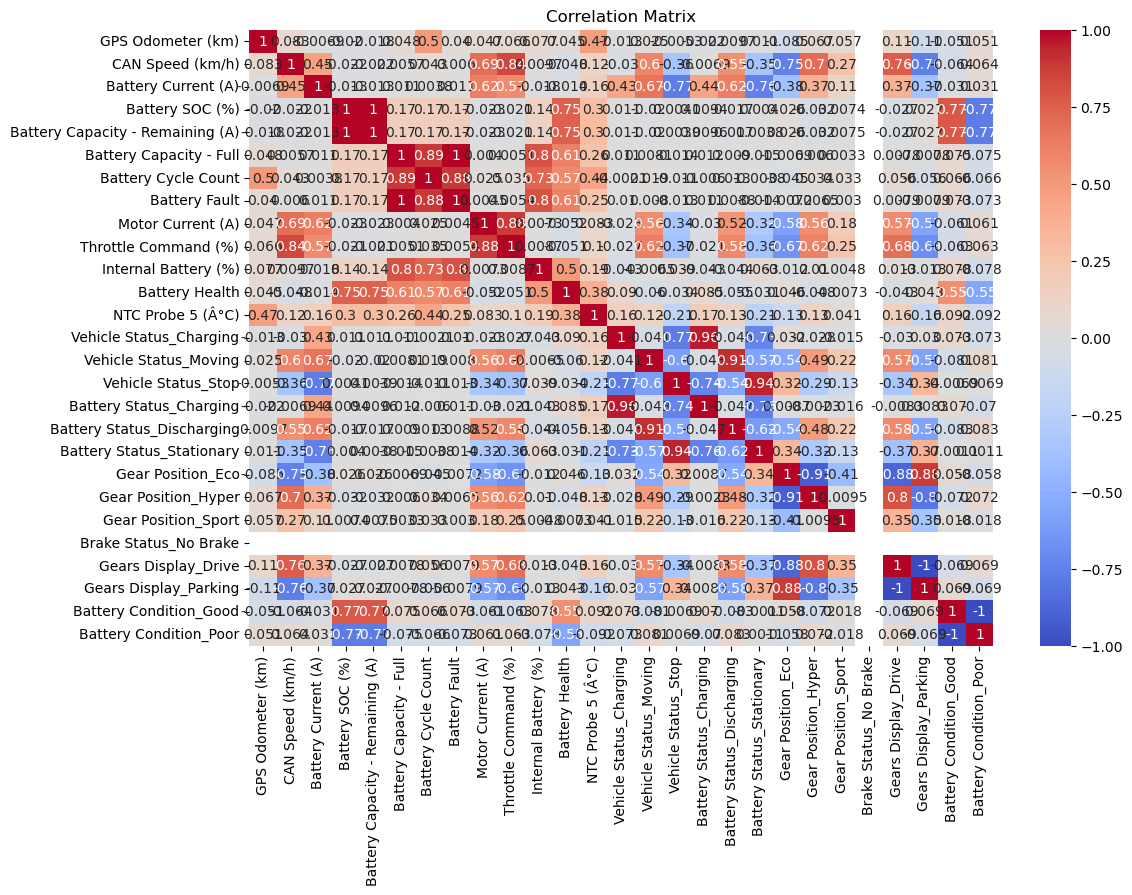

In [35]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Replace '#DIV/0!' with NaN 
dataset_04 = dataset_04.replace('#DIV/0!', np.nan) 
# Select only numeric columns, including boolean if they are relevant 
numeric_df = dataset_04.select_dtypes(include=[np.number, bool]) 
# Convert all columns to numeric, forcing conversion and setting errors to NaN 
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce') 
# Handle missing values by filling them with 0 (or another appropriate method) 
numeric_df = numeric_df.fillna(0) 
# Compute the correlation matrix 
corr_matrix = numeric_df.corr() 
# Plot the correlation matrix 
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title('Correlation Matrix')
plt.show()

With a preliminary look at the dataset, we can see that there are some correlative results coming from the inputs. 

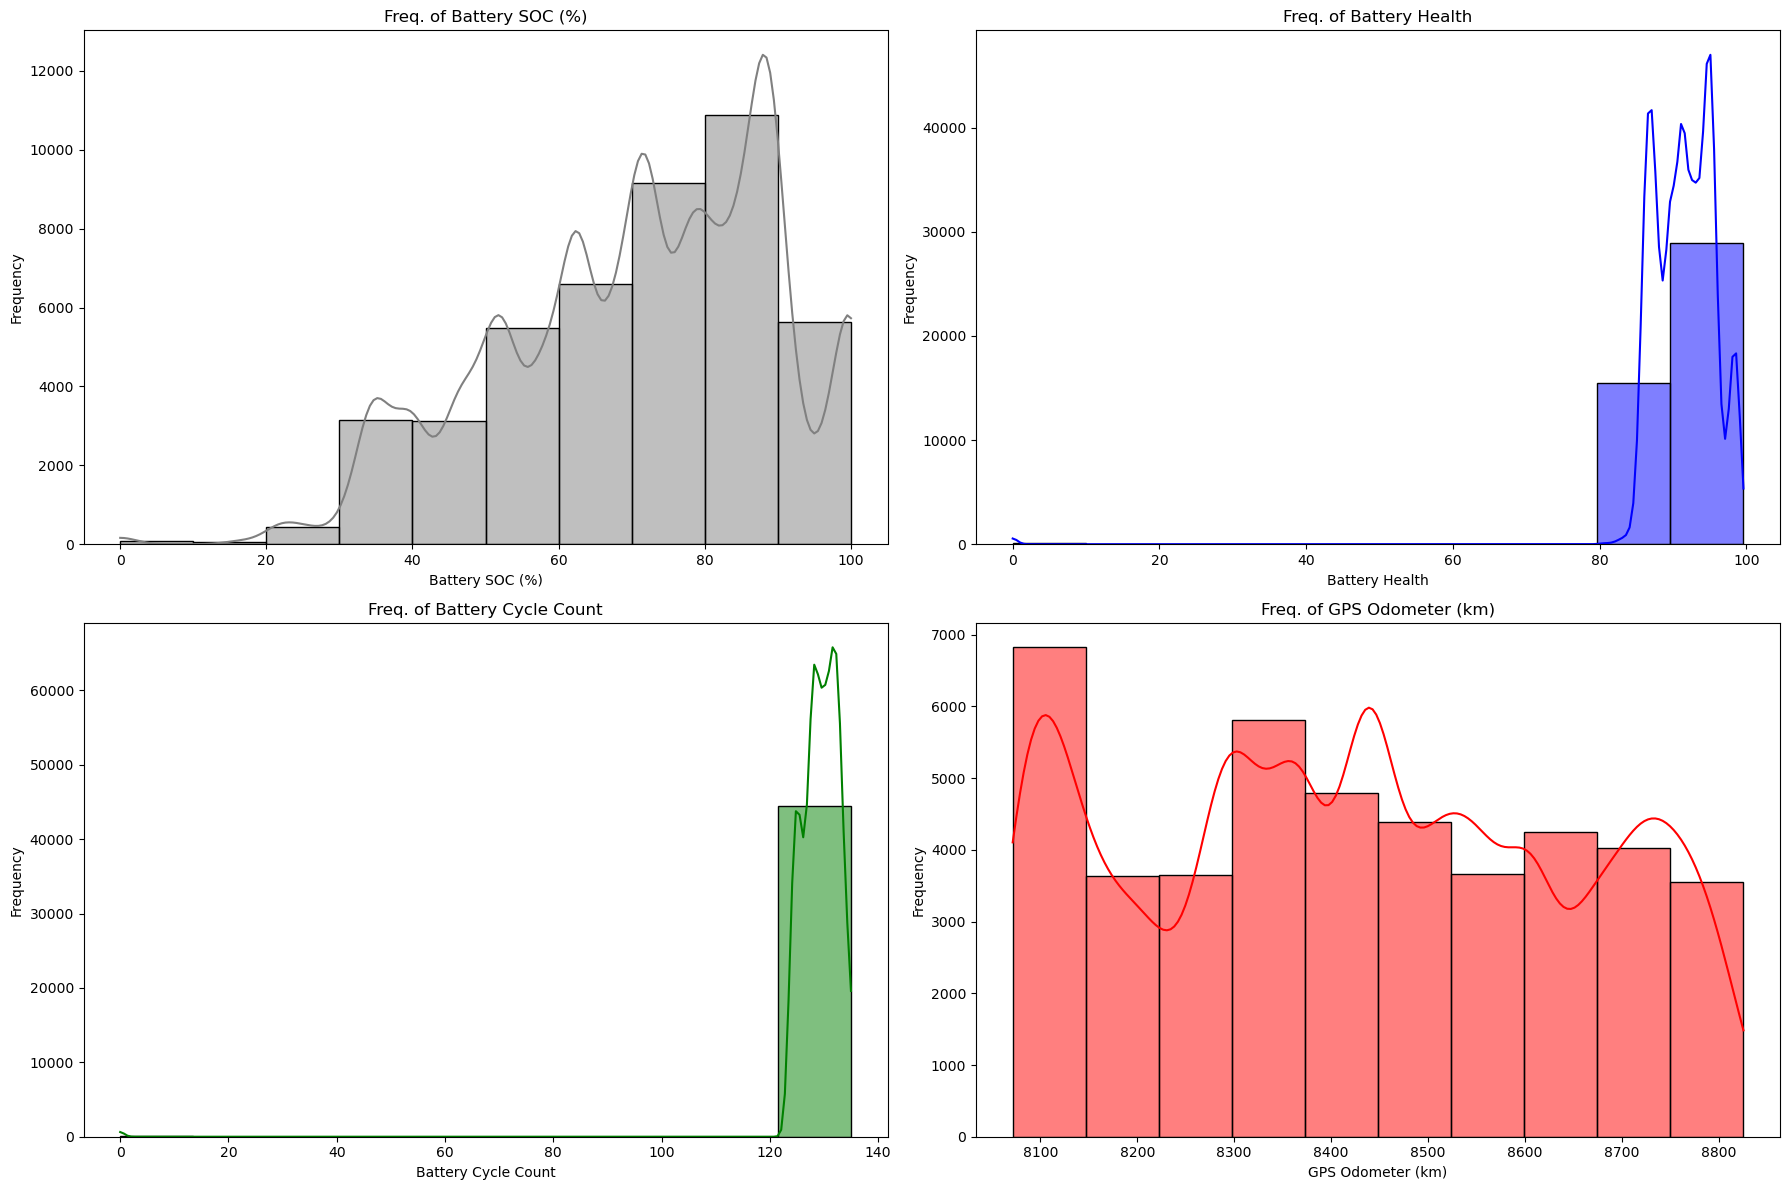

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_04 is already defined and contains the required columns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjusted height for better layout

# Battery State of Charge
sns.histplot(dataset_04['Battery SOC (%)'], bins=10, kde=True, ax=axes[0, 0], color='gray', edgecolor='black')
axes[0, 0].set_title('Freq. of Battery SOC (%)')
axes[0, 0].set_xlabel('Battery SOC (%)')
axes[0, 0].set_ylabel('Frequency')

# Battery Health
sns.histplot(dataset_04['Battery Health'], bins=10, kde=True, ax=axes[0, 1], color='blue', edgecolor='black')
axes[0, 1].set_title('Freq. of Battery Health')
axes[0, 1].set_xlabel('Battery Health')
axes[0, 1].set_ylabel('Frequency')

# Battery Cycle Count
sns.histplot(dataset_04['Battery Cycle Count'], bins=10, kde=True, ax=axes[1, 0], color='green', edgecolor='black')
axes[1, 0].set_title('Freq. of Battery Cycle Count')
axes[1, 0].set_xlabel('Battery Cycle Count')
axes[1, 0].set_ylabel('Frequency')

# GPS Odometer
sns.histplot(dataset_04['GPS Odometer (km)'], bins=10, kde=True, ax=axes[1, 1], color='red', edgecolor='black')
axes[1, 1].set_title('Freq. of GPS Odometer (km)')
axes[1, 1].set_xlabel('GPS Odometer (km)')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


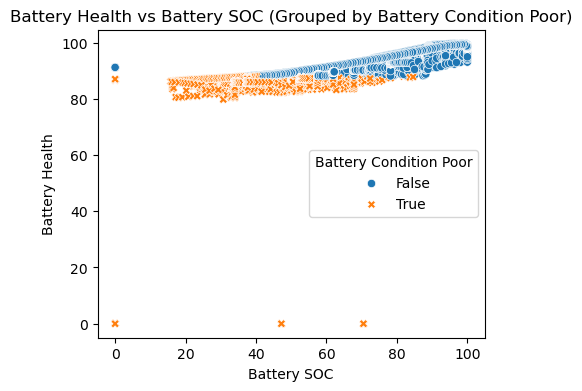

In [148]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Battery SOC (%)', y='Battery Health', hue='Battery Condition_Poor', data=dataset_04, style='Battery Condition_Poor')

# Adding labels and title
plt.xlabel('Battery SOC (%)')
plt.ylabel('Battery Health')
plt.title('Battery Health vs Battery SOC (Grouped by Battery Condition Poor)')
plt.legend(title='Battery Condition Poor')
plt.show()

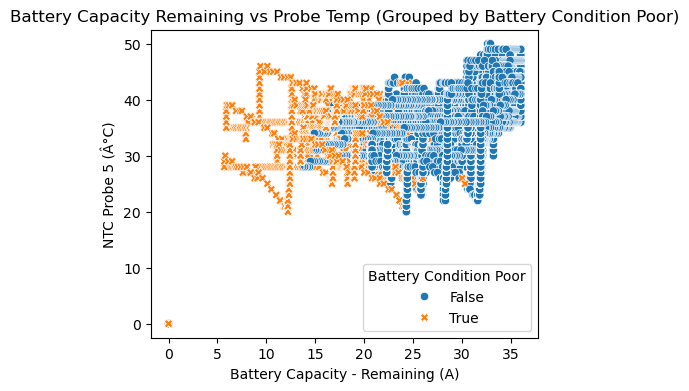

In [150]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Battery Capacity - Remaining (A)', y='NTC Probe 5 (Â°C)', hue='Battery Condition_Poor', data=dataset_04, style='Battery Condition_Poor')

# Adding labels and title
plt.xlabel('Battery Capacity - Remaining (A)')
plt.ylabel('NTC Probe 5 (Â°C)')
plt.title('Battery Capacity Remaining vs Probe Temp (Grouped by Battery Condition Poor)')
plt.legend(title='Battery Condition Poor')
plt.show()

## 2.4 Separate the Input and Output

In [59]:
# Regression Method
yr4 = dataset_04.loc[:, 'NTC Probe 5 (Â°C)'].values
Xr4 = dataset_04.drop(columns=['NTC Probe 5 (Â°C)', 'Battery Condition_Good', 'Battery Condition_Poor']).values
yr7 = dataset_07.loc[:, 'NTC Probe 5 (Â°C)'].values
Xr7 = dataset_07.drop(columns=['NTC Probe 5 (Â°C)', 'Battery Condition_Good', 'Battery Condition_Poor']).values

# Classification Method
yc4 = dataset_04.loc[:, 'Battery Condition_Poor'].values
Xc4 = dataset_04.drop(columns=['Battery Health', 'Battery Condition_Good', 'Battery Condition_Poor']).values
yc7 = dataset_07.loc[:, 'Battery Condition_Poor'].values
Xc7 = dataset_07.drop(columns=['Battery Health', 'Battery Condition_Good', 'Battery Condition_Poor']).values

In [61]:
pd.DataFrame(yr4)
pd.DataFrame(Xr4)
pd.DataFrame(yr7)
pd.DataFrame(Xr7)
pd.DataFrame(yc4)
pd.DataFrame(Xc4)
pd.DataFrame(yc7)
pd.DataFrame(Xc7)
print("All items converted")

All items converted


## 2.5 Splitting the Test and Training Set

In [64]:
from sklearn.model_selection import train_test_split
X_train_r4, X_test_r4, y_train_r4, y_test_r4 = train_test_split(Xr4, yr4, test_size = 0.2, random_state = 0)
X_train_r7, X_test_r7, y_train_r7, y_test_r7 = train_test_split(Xr7, yr7, test_size = 0.2, random_state = 0)
X_train_c4, X_test_c4, y_train_c4, y_test_c4 = train_test_split(Xc4, yc4, test_size = 0.2, random_state = 0)
X_train_c7, X_test_c7, y_train_c7, y_test_c7 = train_test_split(Xc7, yc7, test_size = 0.2, random_state = 0)

## 2.6 Scaling the Data

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_r4_sc = sc_X.fit_transform(X_train_r4)
X_test_r4_sc = sc_X.transform(X_test_r4)
y_train_r4_sc = sc_y.fit_transform(y_train_r4.reshape(-1, 1))
y_test_r4_sc = sc_y.transform(y_test_r4.reshape(-1, 1))

X_train_r7_sc = sc_X.fit_transform(X_train_r7)
X_test_r7_sc = sc_X.transform(X_test_r7)
y_train_r7_sc = sc_y.fit_transform(y_train_r7.reshape(-1, 1))
y_test_r7_sc = sc_y.transform(y_test_r7.reshape(-1, 1))

X_train_c4_sc = sc_X.fit_transform(X_train_c4)
X_test_c4_sc = sc_X.transform(X_test_c4)
y_train_c4_sc = sc_y.fit_transform(y_train_c4.reshape(-1, 1))
y_test_c4_sc = sc_y.transform(y_test_c4.reshape(-1, 1))

X_train_c7_sc = sc_X.fit_transform(X_train_c7)
X_test_c7_sc = sc_X.transform(X_test_c7)
y_train_c7_sc = sc_y.fit_transform(y_train_c7.reshape(-1, 1))
y_test_c7_sc = sc_y.transform(y_test_c7.reshape(-1, 1))

# 3. Regression Model

In this analysis, we shall perform a regression analysis of the battery temperature. Originally it was planned to be with regards to the battery health numeric value, though later it was found taht it could be more valuable to observe another reaction of the battry.

## 3.1 Support Vector Regression (SVR)

In [72]:
from sklearn.svm import SVR
SVR_regressor_4 = SVR(kernel = 'rbf')
SVR_regressor_4.fit(X_train_r4_sc, y_train_r4_sc.reshape(len(y_train_r4_sc),))

SVR()

In [73]:
y_pred_SVR_4 = SVR_regressor_4.predict(X_test_r4_sc)
y_pred_SVR_41 = sc_y.inverse_transform(y_pred_SVR_4.reshape(-1, 1))
y_test_41 = sc_y.inverse_transform(y_test_r4_sc.reshape(-1, 1))

In [74]:
SVR_regressor_7 = SVR(kernel = 'rbf')
SVR_regressor_7.fit(X_train_r7_sc, y_train_r7_sc.reshape(len(y_train_r7_sc),))

SVR()

In [75]:
y_pred_SVR_7 = SVR_regressor_7.predict(X_test_r7_sc)
y_pred_SVR_71 = sc_y.inverse_transform(y_pred_SVR_7.reshape(-1, 1))
y_test_71 = sc_y.inverse_transform(y_test_r7_sc.reshape(-1, 1))

### Scatter plot of predicted vs actual values

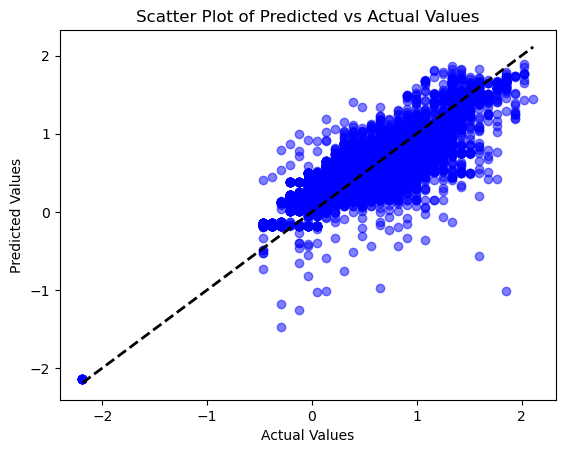

In [77]:
# Scatter plot of predicted vs actual values
plt.scatter(y_test_41, y_pred_SVR_41, color='blue', alpha=0.5)
plt.plot([y_test_41.min(), y_test_41.max()], [y_test_41.min(), y_test_41.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

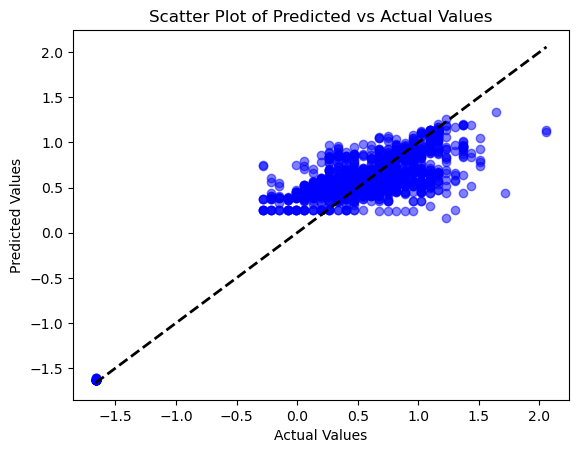

In [78]:
plt.scatter(y_test_71, y_pred_SVR_71, color='blue', alpha=0.5)
plt.plot([y_test_71.min(), y_test_71.max()], [y_test_71.min(), y_test_71.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

### Random Check:

In [80]:
print("The Prediction Temp=",y_pred_SVR_71[13])
print("The Actual Temp=",y_test_71[13])

The Prediction Temp= [0.43862177]
The Actual Temp= [0.40407156]


### Evaluating the Model Performance

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test_41, y_pred_SVR_41)

0.6518990185181248

In [83]:
r2_score(y_test_71, y_pred_SVR_71)

0.7055629129549881

## 3.2 Linear Regression (LR)

In [85]:
from sklearn.linear_model import LinearRegression
linear_regressor_4 = LinearRegression()
linear_regressor_4.fit(X_train_r4_sc, y_train_r4_sc)

LinearRegression()

In [86]:
linear_regressor_7 = LinearRegression()
linear_regressor_7.fit(X_train_r7_sc, y_train_r7_sc)

LinearRegression()

### Checking the Results

In [88]:
y_pred_linear_regressor_4 = linear_regressor_4.predict(X_test_r4_sc)
y_pred_linear_regressor_41 = sc_y.inverse_transform(y_pred_linear_regressor_4.reshape(-1, 1))
y_test_r41 = sc_y.inverse_transform(y_test_r4_sc.reshape(-1, 1))

In [89]:
y_pred_linear_regressor_7 = linear_regressor_7.predict(X_test_r7_sc)
y_pred_linear_regressor_71 = sc_y.inverse_transform(y_pred_linear_regressor_7.reshape(-1, 1))
y_test_r71 = sc_y.inverse_transform(y_test_r7_sc.reshape(-1, 1))

### Scatter plot of actual vs. predicted values

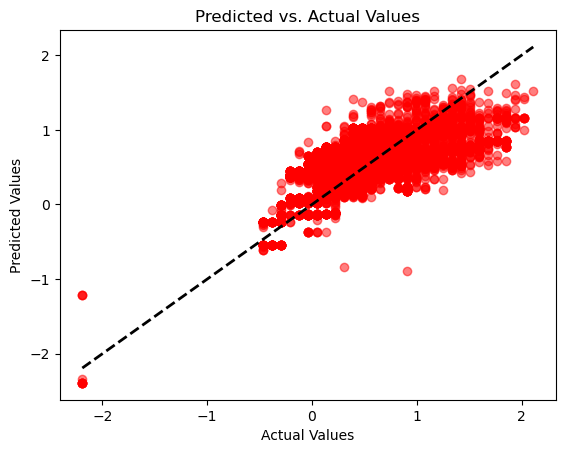

In [91]:
plt.scatter(y_test_r41, y_pred_linear_regressor_41, color='red', alpha=0.5)
plt.plot([y_test_r41.min(), y_test_r41.max()], [y_test_r41.min(), y_test_r41.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test_r41, y_pred_linear_regressor_41)

0.4472821932571024

In [93]:
r2_score(y_test_r71, y_pred_linear_regressor_71)

0.7038207799588367

## 3.3 Polynomial Regression (PR)

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_r4_sc)
polynomial_regression= LinearRegression()
polynomial_regression.fit(X_train_r4_sc, y_train_r4_sc)

LinearRegression()

In [96]:
y_pred_polynomial_regressor = polynomial_regression.predict(X_test_r4_sc)
y_pred_polynomial_regressor1 = sc_y.inverse_transform(y_pred_polynomial_regressor.reshape(-1, 1))
y_test1 = sc_y.inverse_transform(y_test_r4_sc.reshape(-1, 1))

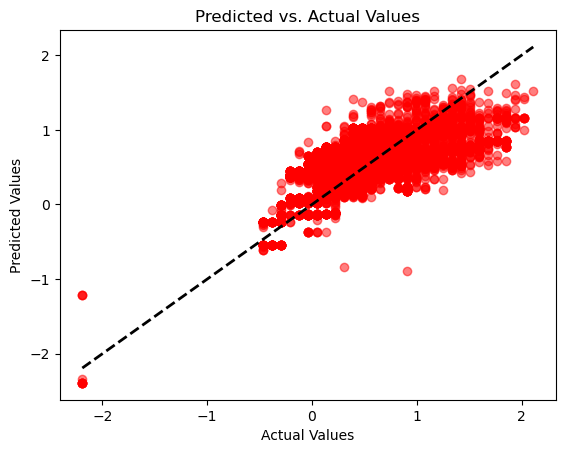

In [97]:
plt.scatter(y_test1, y_pred_polynomial_regressor1, color='red', alpha=0.5)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test_r41, y_pred_polynomial_regressor1)

0.4472821932571024

## 3.4 Artificial Neural Network (ANN)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
# Define the model
ANN_regressor_model = Sequential()
ANN_regressor_model.add(Dense(16, activation='relu'))  # 3rd hidden layer with 16 nodes
ANN_regressor_model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 nodes
ANN_regressor_model.add(Dense(1))  # Output layer for regression (1 node)


In [102]:
ANN_regressor_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [103]:
history = ANN_regressor_model.fit(X_train_r4_sc, y_train_r4_sc, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6260 - mae: 0.6288 - val_loss: 0.3649 - val_mae: 0.4882
Epoch 2/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3603 - mae: 0.4826 - val_loss: 0.3305 - val_mae: 0.4621
Epoch 3/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3316 - mae: 0.4600 - val_loss: 0.3127 - val_mae: 0.4484
Epoch 4/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3214 - mae: 0.4512 - val_loss: 0.3035 - val_mae: 0.4388
Epoch 5/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2990 - mae: 0.4346 - val_loss: 0.2943 - val_mae: 0.4321
Epoch 6/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2930 - mae: 0.4286 - val_loss: 0.2850 - val_mae: 0.4220
Epoch 7/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2807 - mae: 0.4199 - val_loss: 0.2806 - val_mae: 0.4202
Epoch 8/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2721 - mae: 0.4119 - val_loss: 0.2710 - val_mae: 0.4132
Epoch 9/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [104]:
y_pred_ANN_regressor = ANN_regressor_model.predict(X_test_r4_sc)

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


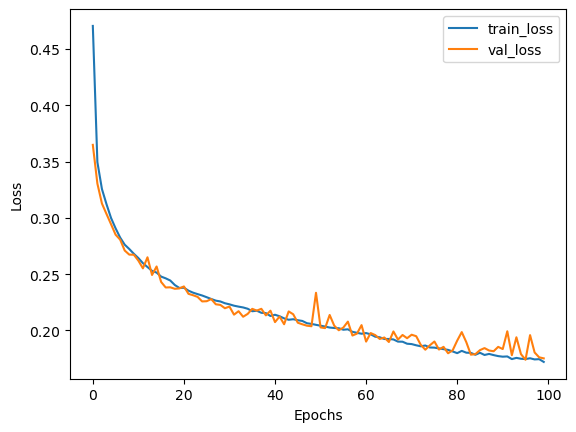

In [105]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
r2 = r2_score(y_test_r4_sc, y_pred_ANN_regressor)
print(f"R² Score: {r2}")

R² Score: 0.8101327224491762


# 4. Classification Model

Having added the classification side to this analysis, we have first added classifications based on the battery health percentage. In this analysis, we classify a battery with health below 88% as poor and >88% as good. Using these alternative classification models, we shall assess whether or not better classification algorithems exist for this dataset.

In the classificataion, we will be assessing with KNN, Decision Tree, Random Forest, Gaussian NB, Linear SVC, Logistic Regression, and ANN classification methods.

## 4.1 Initializing and Running All models

In [110]:
# Import libraries
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [178]:
# Initialize the classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10), 
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators = 10),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": LinearSVC(max_iter=10000, random_state=42),
    "Nonlinear SVM": SVC(kernel='rbf'),
    "Logistic Regression": LogisticRegression(),
    "ANN": tf.keras.models.Sequential()
}

In [194]:
# Initialize Stored Results
accuracy_results_c4 = {}

# Training and Evaluating models
for model_name, model in models.items():
    if model_name == "ANN":
        # Define the ANN architecture 
        model = tf.keras.models.Sequential([ 
            tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train_c4_sc.shape[1],)), 
            tf.keras.layers.Dense(16, activation='relu'), 
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        # Compiling the ANN
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

        # Train the model
        model.fit(X_train_c4_sc, y_train_c4, batch_size = 32, epochs = 100, verbose=0)

        # Make predictions on the training and test data 
        y_train_pred_prob_c4 = model.predict(X_train_c4_sc) 
        y_test_pred_prob_c4 = model.predict(X_test_c4_sc) 
                        
        # Convert probabilities to class labels 
        y_train_pred_c4 = np.argmax(y_train_pred_prob_c4, axis=1) 
        y_test_pred_c4 = np.argmax(y_test_pred_prob_c4, axis=1)
    else:
        # Fit the model to the training data 
        model.fit(X_train_c4_sc, y_train_c4) 
        
        # Make predictions on the training and test data 
        y_train_pred_c4 = model.predict(X_train_c4_sc) 
        y_test_pred_c4 = model.predict(X_test_c4_sc)
    
    # Calculate the training and test accuracy
    train_accuracy_c4 = accuracy_score(y_train_c4, y_train_pred_c4)
    test_accuracy_c4 = accuracy_score(y_test_c4, y_test_pred_c4)
    
    # Store the results in the dictionary
    accuracy_results_c4[model_name] = {
        "Train Accuracy": train_accuracy_c4 * 100,
        "Test Accuracy": test_accuracy_c4 * 100,
        "Train Predictions": y_train_pred_c4,
        "Test Predictions": y_test_pred_c4
    }
    
    # Print the accuracy for each model
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy_c4 * 100:.2f}%")
    print(f"  Test Accuracy: {test_accuracy_c4 * 100:.2f}%\n")



K-Nearest Neighbors:
  Training Accuracy: 99.25%
  Test Accuracy: 99.11%

Decision Tree:
  Training Accuracy: 99.77%
  Test Accuracy: 99.13%

Random Forest:
  Training Accuracy: 99.74%
  Test Accuracy: 99.43%

Naive Bayes:
  Training Accuracy: 82.81%
  Test Accuracy: 82.27%



C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM:
  Training Accuracy: 98.94%
  Test Accuracy: 98.87%

Nonlinear SVM:
  Training Accuracy: 99.03%
  Test Accuracy: 98.82%

Logistic Regression:
  Training Accuracy: 98.92%
  Test Accuracy: 98.81%



C:\Users\nikol\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1115/1115 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
ANN:
  Training Accuracy: 99.42%
  Test Accuracy: 99.30%



In [195]:
# Initialize Stored Results
accuracy_results_c7 = {}

# Training and Evaluating models
for model_name, model in models.items():
    if model_name == "ANN":
        # Define the ANN architecture 
        model = tf.keras.models.Sequential([ 
            tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train_c7_sc.shape[1],)), 
            tf.keras.layers.Dense(16, activation='relu'), 
            tf.keras.layers.Dense(3, activation='softmax')
        ])

        # Compiling the ANN
        model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

        # Train the model
        model.fit(X_train_c7_sc, y_train_c7, batch_size = 32, epochs = 100, verbose=0)

        # Make predictions on the training and test data 
        y_train_pred_prob_c7 = model.predict(X_train_c7_sc) 
        y_test_pred_prob_c7 = model.predict(X_test_c7_sc) 
                        
        # Convert probabilities to class labels 
        y_train_pred_c7 = np.argmax(y_train_pred_prob_c7, axis=1) 
        y_test_pred_c7 = np.argmax(y_test_pred_prob_c7, axis=1)
    else:
        # Fit the model to the training data 
        model.fit(X_train_c7_sc, y_train_c7) 
        
        # Make predictions on the training and test data 
        y_train_pred_c7 = model.predict(X_train_c7_sc) 
        y_test_pred_c7 = model.predict(X_test_c7_sc)
    
    # Calculate the training and test accuracy
    train_accuracy_c7 = accuracy_score(y_train_c7, y_train_pred_c7)
    test_accuracy_c7 = accuracy_score(y_test_c7, y_test_pred_c7)
    
    # Store the results in the dictionary
    accuracy_results_c7[model_name] = {
        "Train Accuracy": train_accuracy_c7 * 100,
        "Test Accuracy": test_accuracy_c7 * 100,
        "Train Predictions": y_train_pred_c7,
        "Test Predictions": y_test_pred_c7
    }
    
    # Print the accuracy for each model
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_accuracy_c7 * 100:.2f}%")
    print(f"  Test Accuracy: {test_accuracy_c7 * 100:.2f}%\n")



K-Nearest Neighbors:
  Training Accuracy: 99.52%
  Test Accuracy: 99.47%

Decision Tree:
  Training Accuracy: 100.00%
  Test Accuracy: 100.00%

Random Forest:
  Training Accuracy: 100.00%
  Test Accuracy: 99.94%

Naive Bayes:
  Training Accuracy: 69.54%
  Test Accuracy: 68.78%

Linear SVM:
  Training Accuracy: 99.97%
  Test Accuracy: 99.94%



C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Nonlinear SVM:
  Training Accuracy: 99.88%
  Test Accuracy: 99.94%

Logistic Regression:
  Training Accuracy: 99.94%
  Test Accuracy: 99.94%



C:\Users\nikol\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN:
  Training Accuracy: 100.00%
  Test Accuracy: 100.00%



In [198]:
# Display accuracy results in a table
import pandas as pd
accuracy_df_4 = pd.DataFrame(accuracy_results_c4).T

accuracy_df_4[['Train Accuracy', 'Test Accuracy']]

,Train Accuracy,Test Accuracy
K-Nearest Neighbors,99.251178,99.113853
Decision Tree,99.770025,99.12507
Random Forest,99.741979,99.42793
Naive Bayes,82.805138,82.265844
Linear SVM,98.937065,98.867078
Nonlinear SVM,99.029616,98.82221
Logistic Regression,98.920238,98.810993
ANN,99.416648,99.304543


In [200]:
accuracy_df_7 = pd.DataFrame(accuracy_results_c7).T

accuracy_df_7[['Train Accuracy', 'Test Accuracy']]

,Train Accuracy,Test Accuracy
K-Nearest Neighbors,99.515774,99.471831
Decision Tree,100.0,100.0
Random Forest,100.0,99.941315
Naive Bayes,69.537784,68.779343
Linear SVM,99.970653,99.941315
Nonlinear SVM,99.882612,99.941315
Logistic Regression,99.941306,99.941315
ANN,100.0,100.0


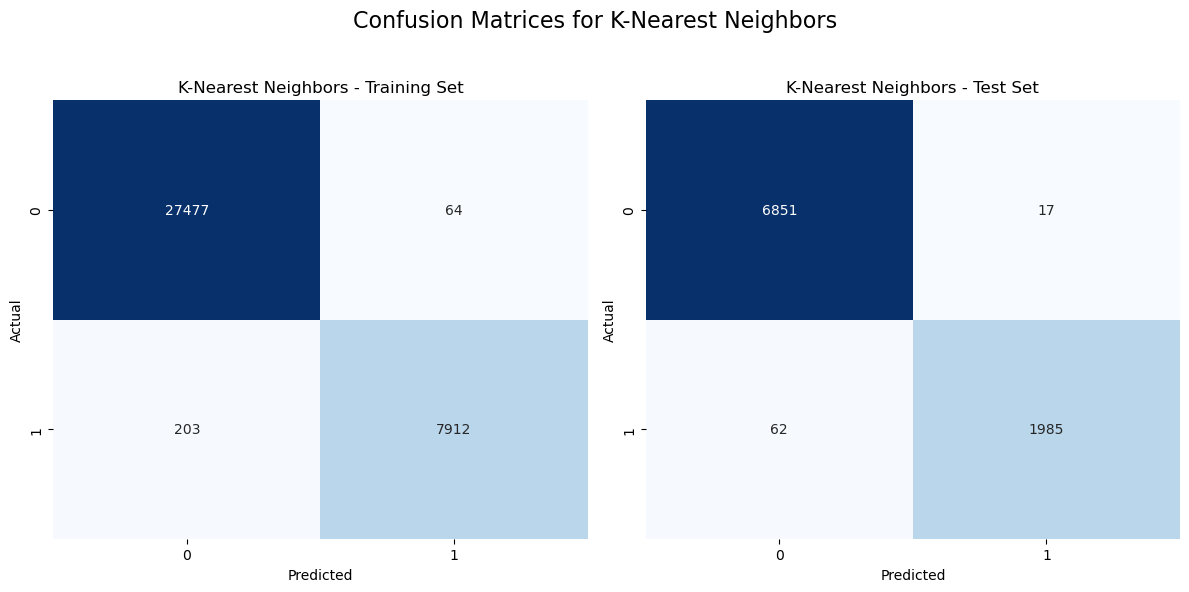

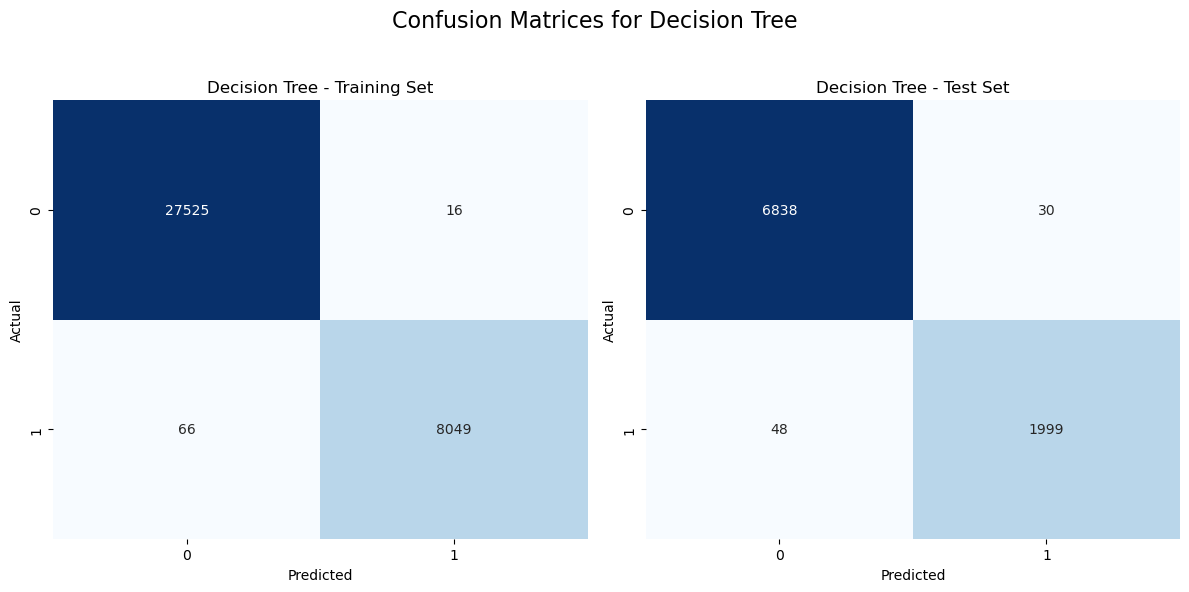

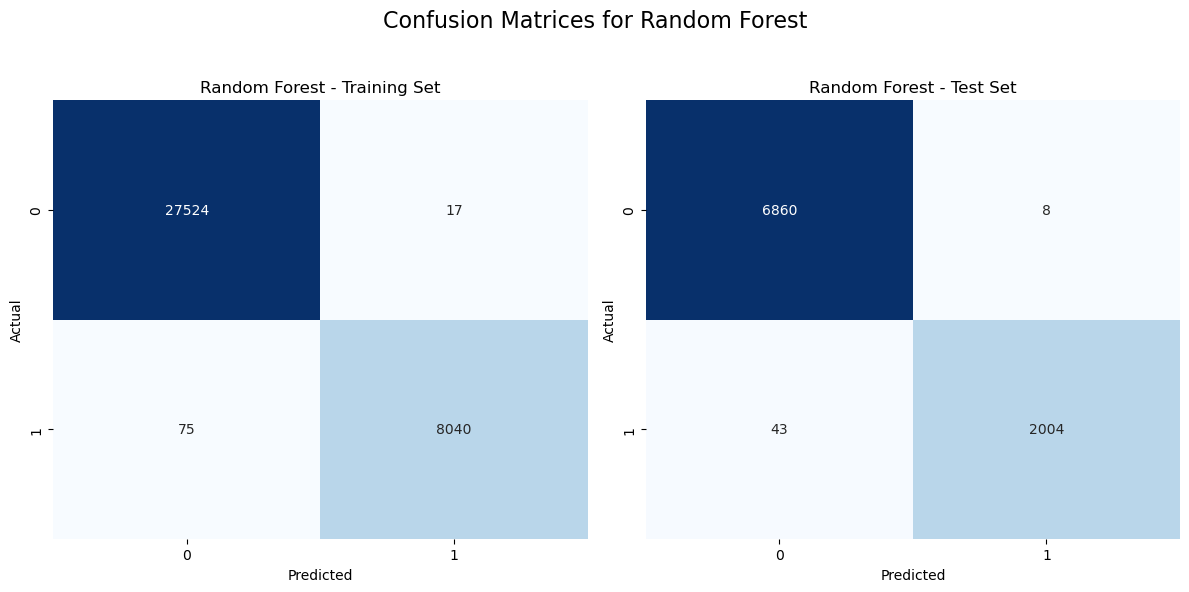

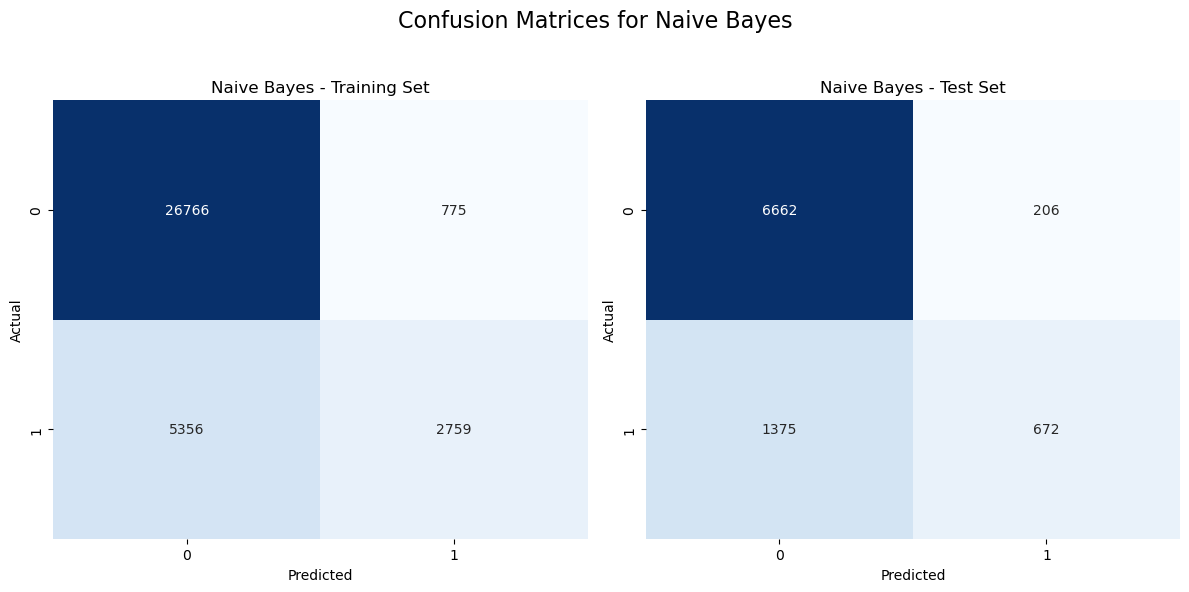

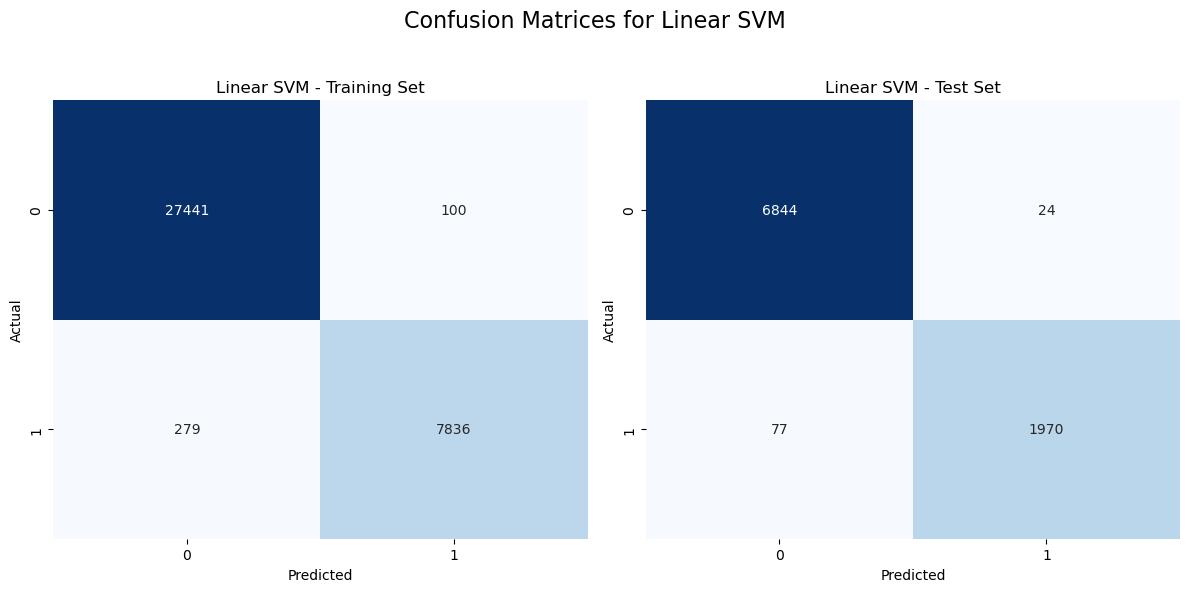

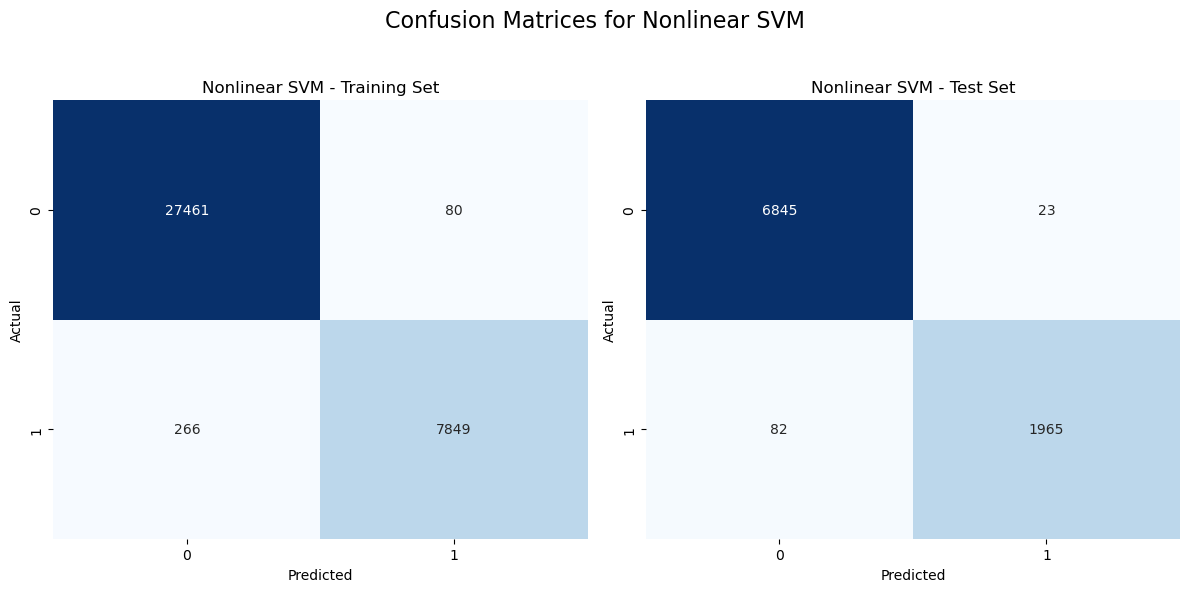

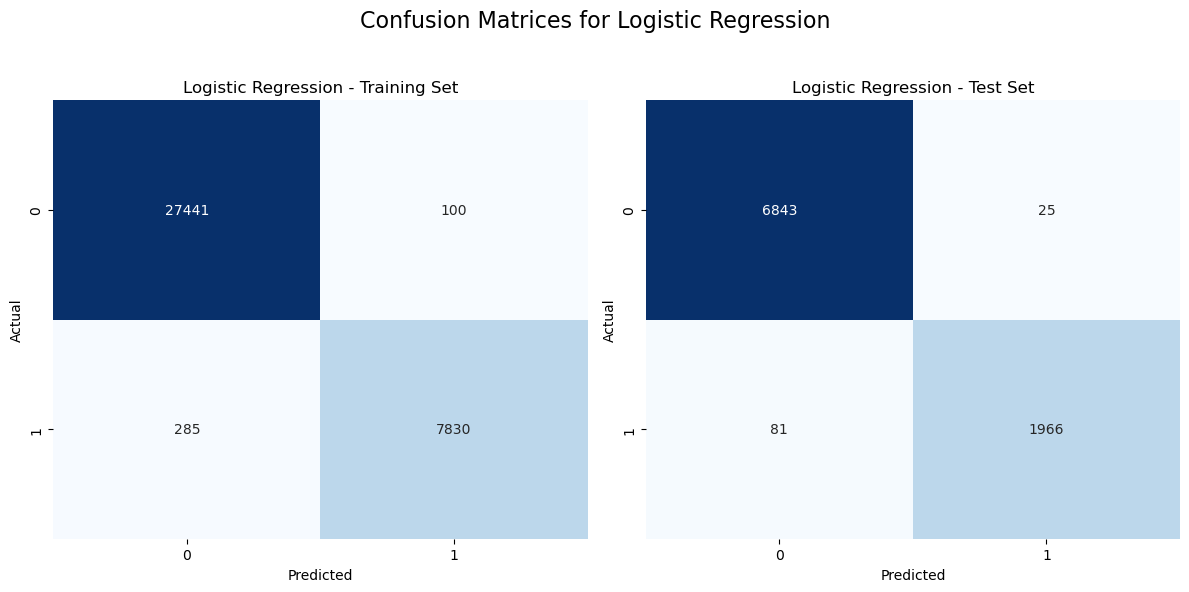

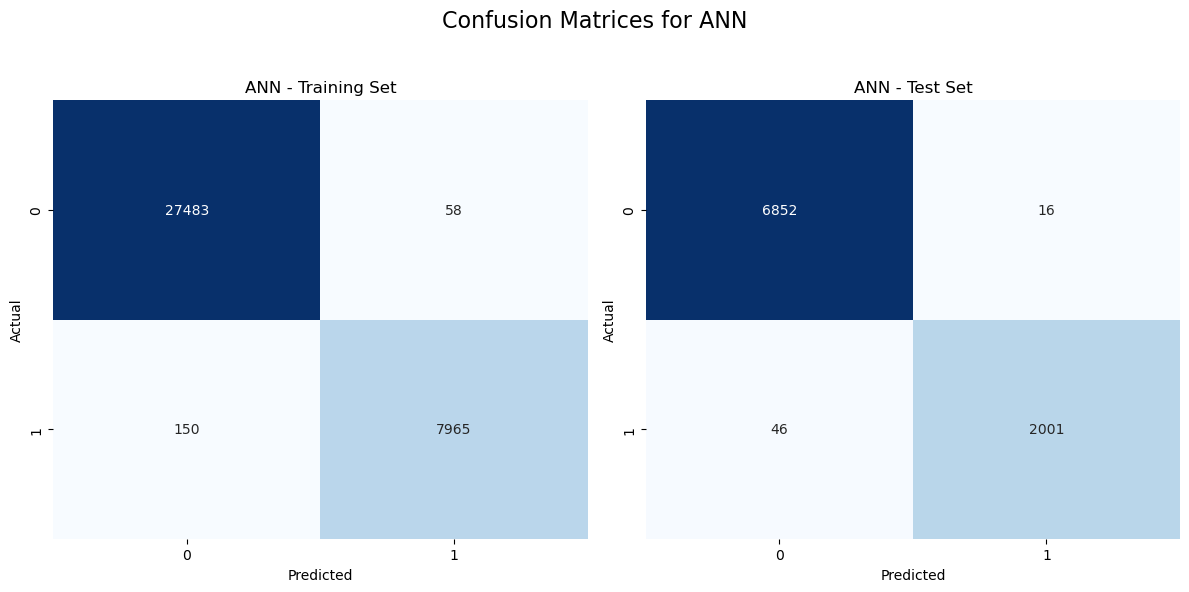

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot a confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Loop through models and generate confusion matrices
for model_name, model in models.items():
    # Retrieve predictions for the current model from the stored results
    y_train_pred_c4 = accuracy_results_c4[model_name]["Train Predictions"]
    y_test_pred_c4 = accuracy_results_c4[model_name]["Test Predictions"]

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Confusion Matrices for {model_name}', fontsize=16)

    # Training confusion matrix
    plot_confusion_matrix(axes[0], y_train_c4, y_train_pred_c4, f'{model_name} - Training Set')
    
    # Test confusion matrix
    plot_confusion_matrix(axes[1], y_test_c4, y_test_pred_c4, f'{model_name} - Test Set')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
    plt.show()


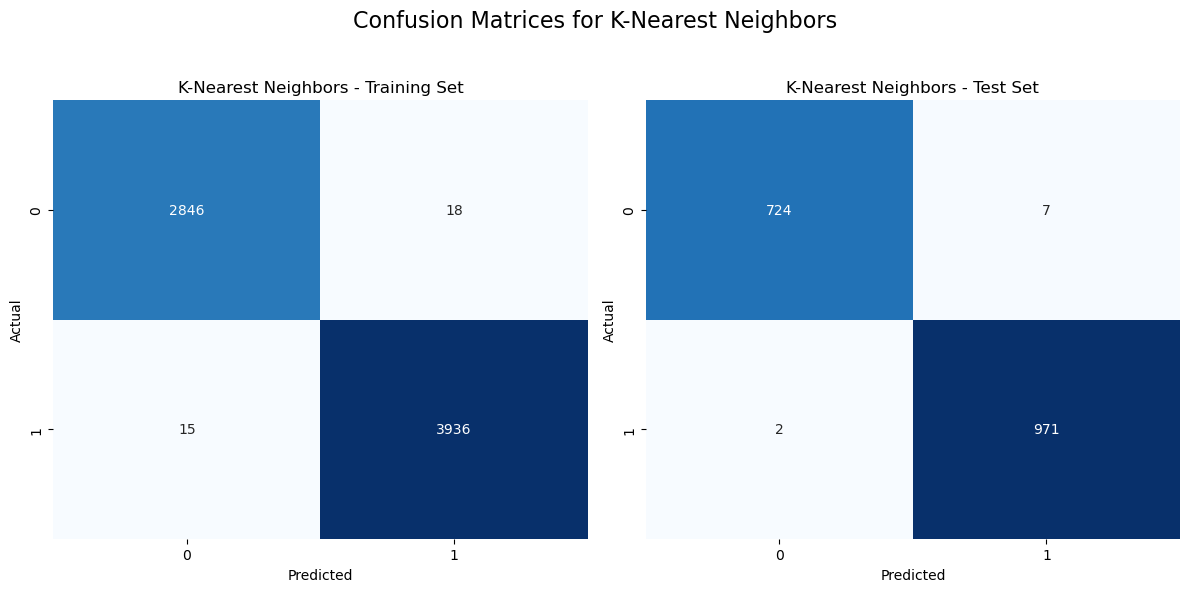

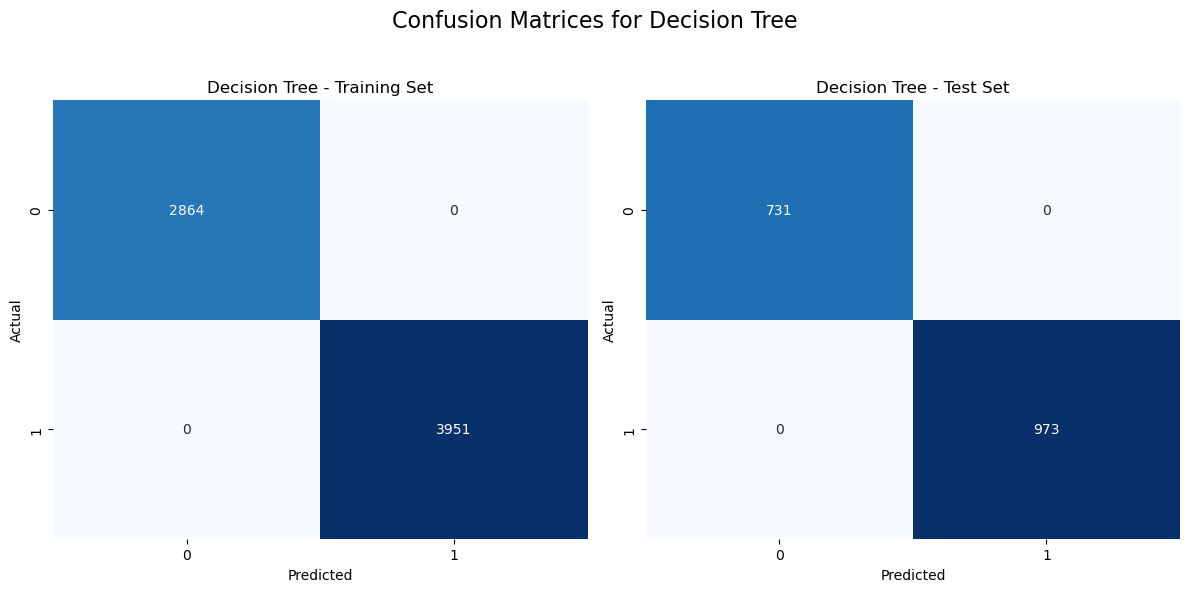

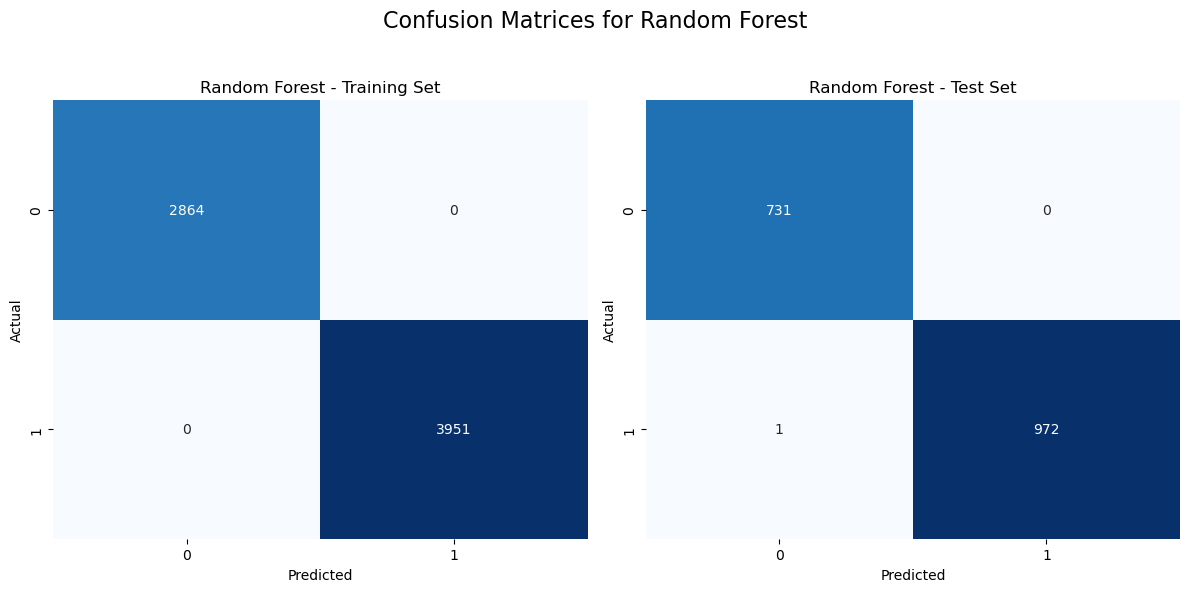

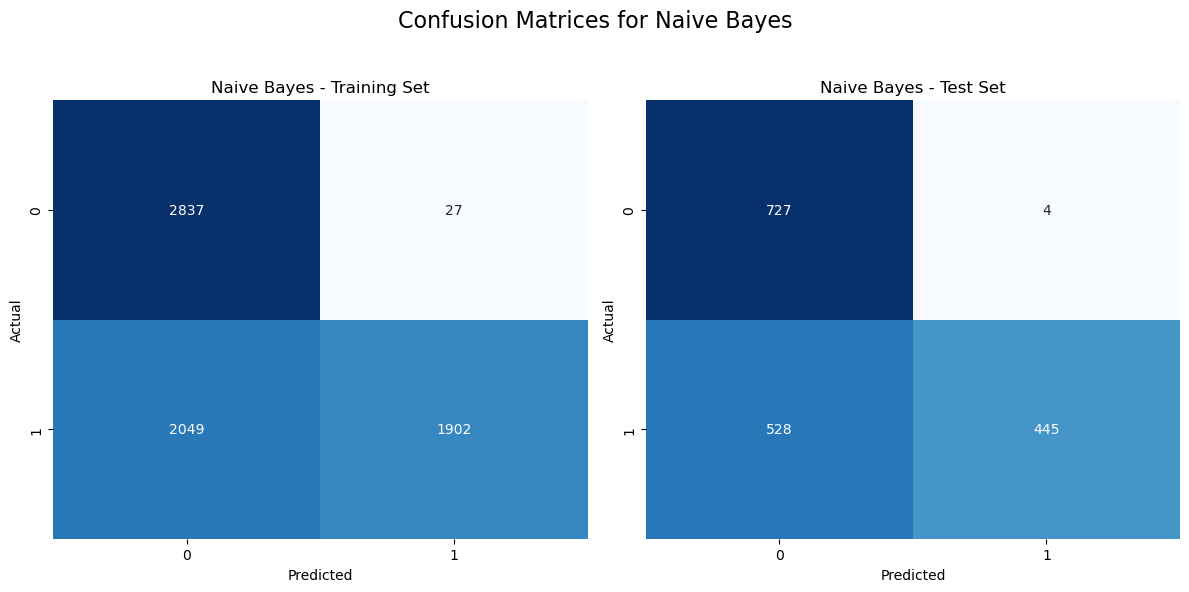

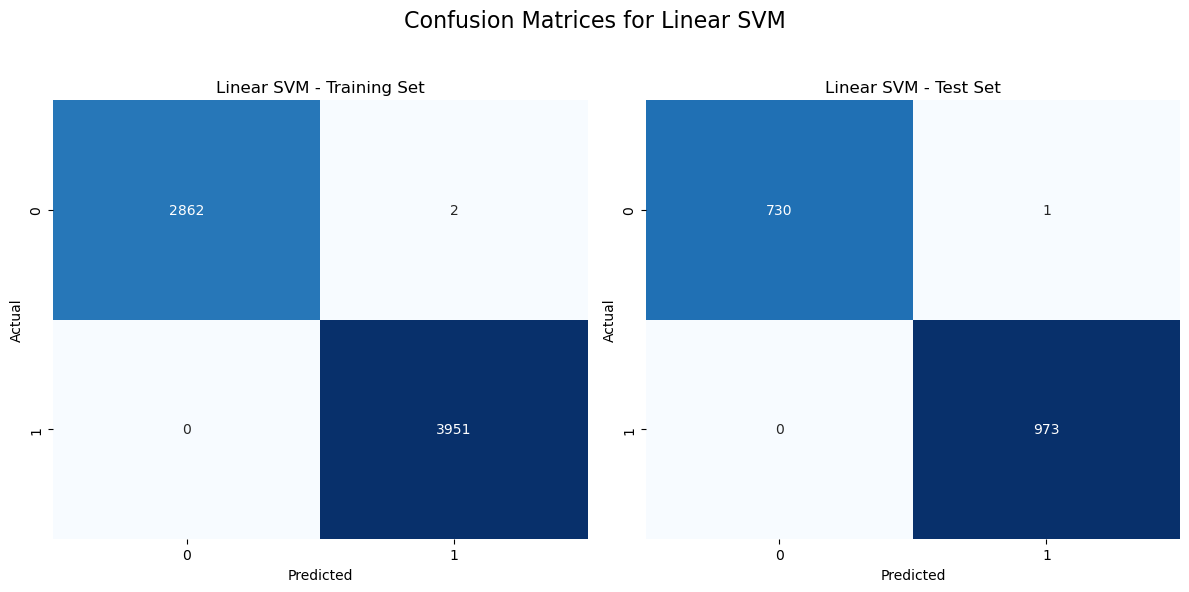

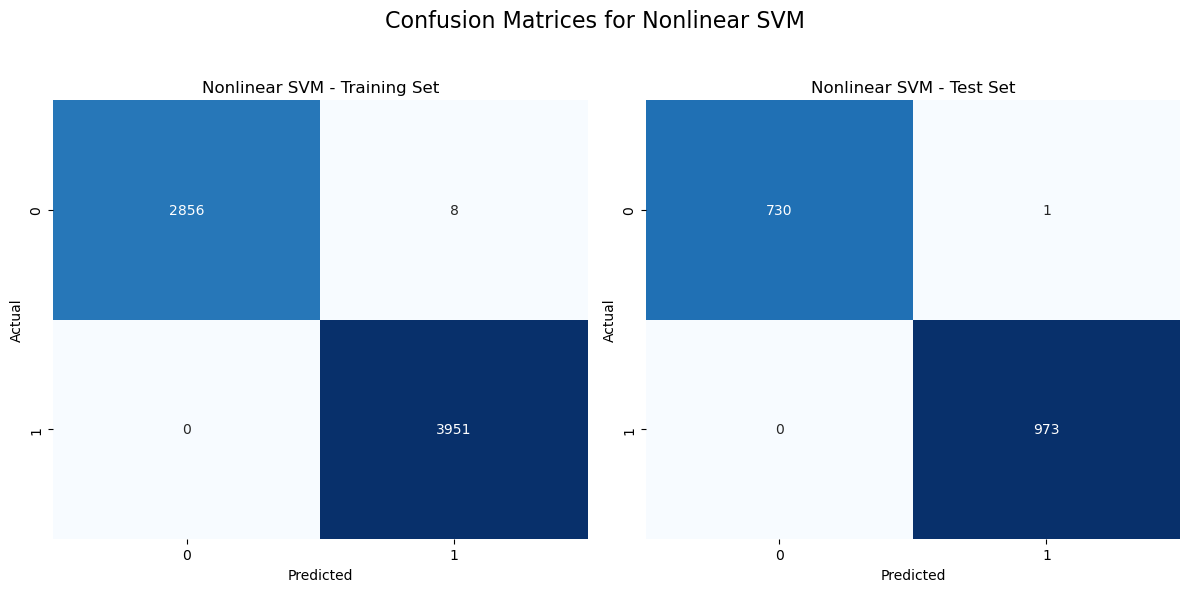

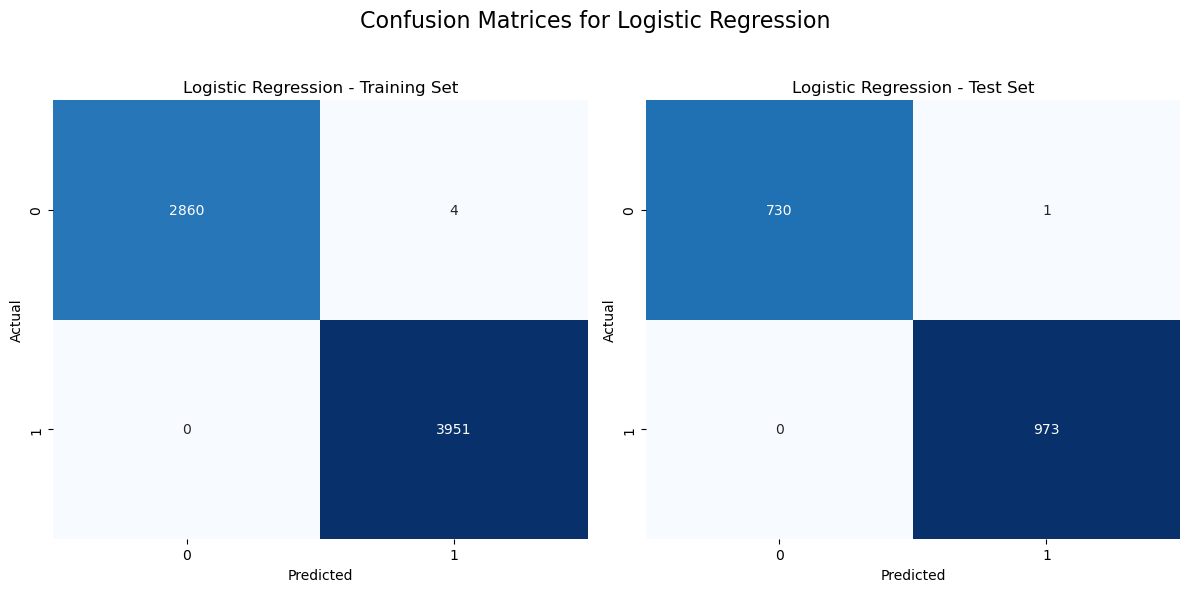

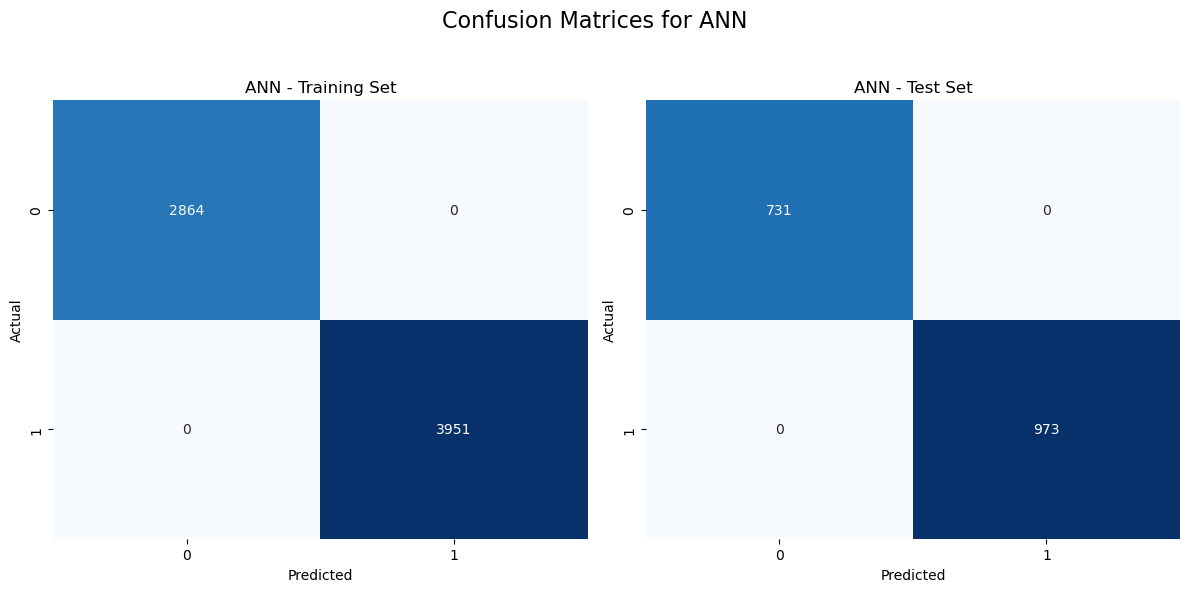

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot a confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Loop through models and generate confusion matrices
for model_name, model in models.items():
    # Retrieve predictions for the current model from the stored results
    y_train_pred_c7 = accuracy_results_c7[model_name]["Train Predictions"]
    y_test_pred_c7 = accuracy_results_c7[model_name]["Test Predictions"]

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'Confusion Matrices for {model_name}', fontsize=16)

    # Training confusion matrix
    plot_confusion_matrix(axes[0], y_train_c7, y_train_pred_c7, f'{model_name} - Training Set')
    
    # Test confusion matrix
    plot_confusion_matrix(axes[1], y_test_c7, y_test_pred_c7, f'{model_name} - Test Set')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
    plt.show()
